# Day 03 — Derivatives as the Learning Signal

## Objective
Understand **how a model knows which direction to change its weights**.

This notebook treats derivatives as **engineering signals**, not abstract math.
By the end, learning will feel mechanical and inevitable.


## Why Derivatives Matter

A model can already compute predictions.

What it cannot answer yet is:
> "If I change this weight slightly, does the loss get better or worse?"

The derivative answers exactly this.

Without derivatives:
- Loss is just a number
- There is no direction
- Learning is impossible


In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Loss Functions as Simple Curves

To understand learning, we start with **1D loss functions**.

Think of:
- x-axis → weight
- y-axis → loss

We begin with the most important prototype:
a **quadratic loss**.


In [2]:
def loss(w):
    return (w - 3) ** 2


## Numerical Derivative (Engineering View)

Instead of using formulas, we **measure slope**.

Numerical derivative:
$$
\frac{dL}{dw} \approx \frac{L(w + h) - L(w)}{h}
$$

This proves derivatives are **observable behavior**, not symbols.


In [3]:
def get_slope(f, w, h=0.0001):
    return (f(w + h) - f(w)) / h


get_slope(loss, w=0)


-5.99990000001327

## Slope Determines Direction

- Positive slope → increasing weight increases loss  
  → move weight **down**
- Negative slope → increasing weight decreases loss  
  → move weight **up**
- Zero slope → weight should stop

This is why we **move opposite to the derivative**.


In [4]:
slope = get_slope(loss, w=0)

if slope > 0:
    print("Move weight down (decrease w)")
elif slope < 0:
    print("Move weight up (increase w)")
else:
    print("At minimum")


Move weight up (increase w)


## Why We Subtract the Derivative

The derivative points in the direction of **increase**.

To minimize loss, we must move in the **opposite direction**.

This is not a convention.
It is a geometric necessity.


## Learning Rate ($\eta$)

The slope tells us **direction**, not how far to move.

The learning rate:
- Scales the step size
- Prevents overshooting
- Connects directly to **scalar multiplication** from Day 01

Too large → divergence  
Too small → slow learning


In [5]:
w = 0.0
learning_rate = 0.1

slope = get_slope(loss, w)
w_new = w - learning_rate * slope

w, w_new


(0.0, 0.599990000001327)

## Visualizing Loss and Slope

We now visualize:
- The loss curve
- The current weight
- Why the update direction makes sense


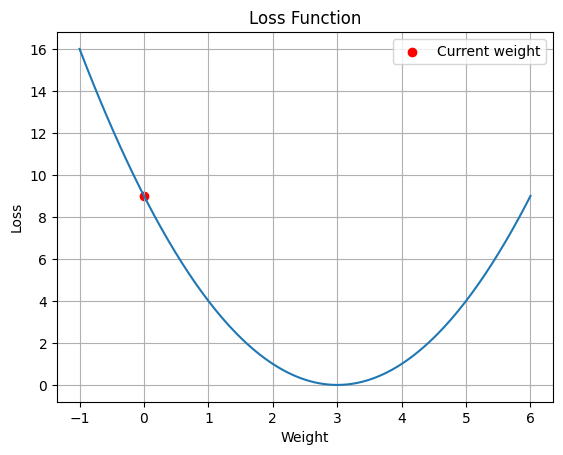

In [6]:
ws = np.linspace(-1, 6, 200)
losses = [loss(w) for w in ws]

plt.plot(ws, losses)
plt.scatter(w, loss(w), color="red", label="Current weight")
plt.xlabel("Weight")
plt.ylabel("Loss")
plt.title("Loss Function")
plt.legend()
plt.grid()
plt.show()


## 1D Gradient Descent Simulation

We now simulate **learning**:
- One weight
- One loss function
- Repeated updates


In [7]:
w = 0.0
learning_rate = 0.1
history = []

for step in range(20):
    slope = get_slope(loss, w)
    history.append((w, loss(w)))
    w = w - learning_rate * slope

history[-1]


(2.9567161641535002, 0.001873490445586737)

## Convergence (Important)

Convergence does NOT mean:
- Loss equals zero

Convergence means:
- The derivative becomes so small
- That the weight stops changing meaningfully

Training stops because **there is no learning signal left**.


## Day 3 Summary — Learning Demystified

- Derivative measures sensitivity of loss
- Sign of slope gives update direction
- Learning rate controls step size
- Weight update = subtraction of scaled slope
- Convergence = vanishing derivative

From now on:
> Learning is just controlled movement downhill.


## Stop Condition

You proceed only if you can:

- Predict update direction instantly
- Explain overshooting using learning rate
- Define convergence without equations
- Describe gradient descent in plain language

If not, repeat Day 3.
